In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [129]:
df=pd.read_csv("austo_automobile.csv")

In [130]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


# Data Profiling : size, shape , columns , data types

In [131]:
df.size # how many total elements in an data frame(rows*col)

22134

In [132]:
df.shape

(1581, 14)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [134]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

###  Duplicates Values

In [135]:
df.duplicated().sum() # check duplicate valuess or row

np.int64(0)

### Null Handling : Missing Values

In [136]:
# check the description to understand the range of values available within the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [137]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [138]:
# working with gender coll

In [139]:
df.Gender.value_counts()  #df.groupby("Gender")["Gender"].count()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [140]:
### check  Descripancies
df.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [141]:
# fixing spelling errors in "Gender" column
df.Gender = df.Gender.replace(["Femal","Femle"],["Female","Female"])

In [142]:
# updated Unique values in Gender column.
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [143]:
# check the values count of gender col
df.Gender.value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [144]:
# Most frequent value is Male in gender col so we can fill all the null values with Male
df.Gender = df.Gender.fillna("Male")

In [145]:
df.Gender = df.Gender.fillna("Male")

In [146]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [147]:
# Now , working with Partner_salary col

In [148]:
# fetch the required col to check the link among them
new=df[df.Partner_salary.notnull()][["Salary","Partner_salary","Total_salary"]]

In [149]:
# to check the formula
(new.Total_salary == new.Salary + new.Partner_salary).unique()

array([ True])

In [150]:
# fill the null values of partner salary using formula
df.Partner_salary = df.apply(lambda row: row.Total_salary-row.Salary 
                             if np.isnan(row.Partner_salary) else row.Partner_salary,axis=1)

In [151]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [152]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [153]:
df.Profession.unique()

array(['Business', 'Salaried'], dtype=object)

In [154]:
df.Marital_status.unique()

array(['Married', 'Single'], dtype=object)

In [155]:
df.Personal_loan.unique()

array(['No', 'Yes'], dtype=object)

In [156]:
df.House_loan.unique()

array(['No', 'Yes'], dtype=object)

In [157]:
df.Partner_working.unique()

array(['Yes', 'No'], dtype=object)

In [158]:
df.Education.unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [159]:
df.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

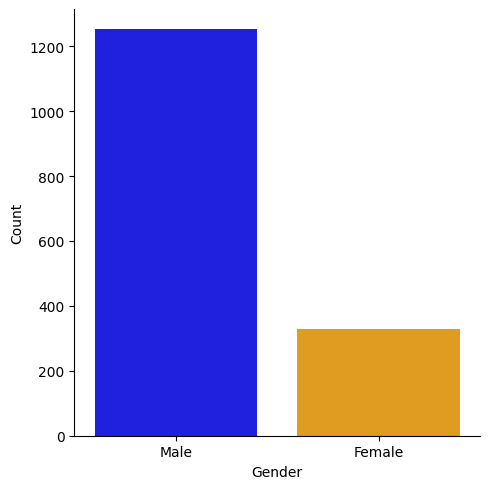

In [160]:
a=sns.catplot(df,x="Gender",y="Age",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange"])
a.set(ylabel='Count')


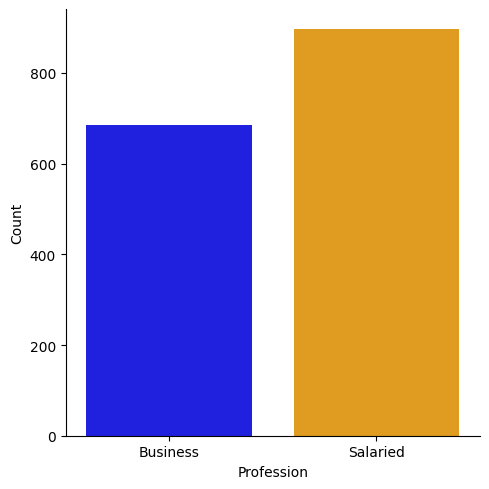

In [161]:
a=sns.catplot(df,x="Profession",y="Age",kind="bar",errorbar=None,estimator="count", palette=["Blue","Orange"])
a.set(ylabel='Count')


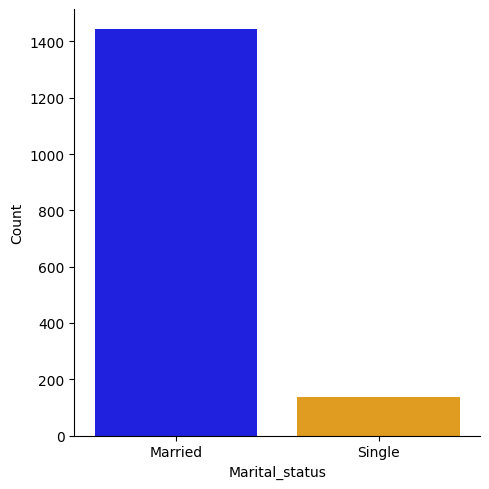

In [162]:
a=sns.catplot(df,x="Marital_status",y="Age",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange"])
a.set(ylabel='Count')


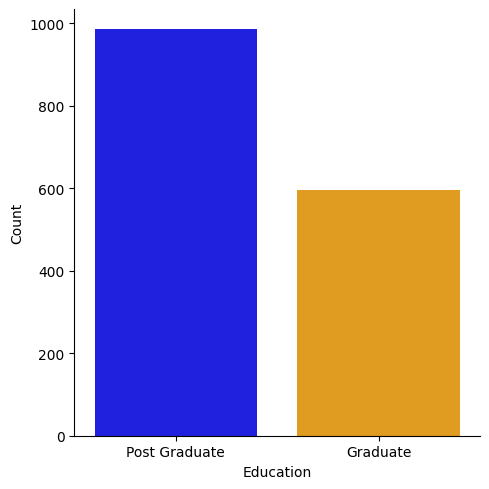

In [163]:
a=sns.catplot(df,x="Education",y="Age",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange"])
a.set(ylabel='Count')


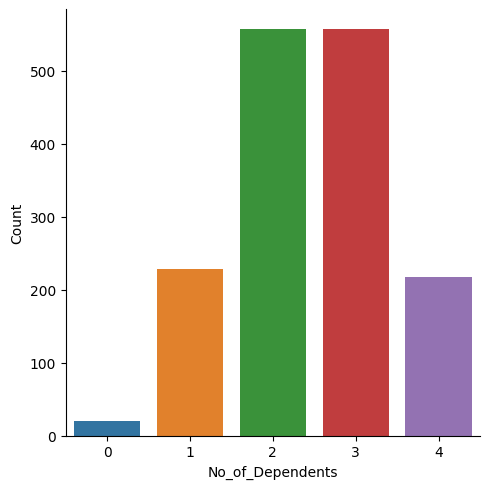

In [164]:
a=sns.catplot(df,x="No_of_Dependents",y="Age",kind="bar",errorbar=None,estimator="count",palette="tab10")
a.set(ylabel='Count')


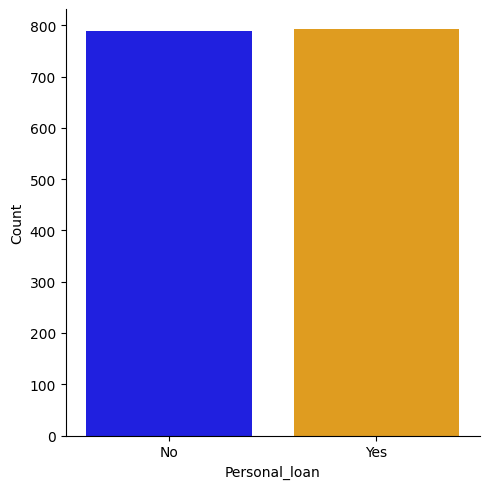

In [165]:
a=sns.catplot(df,x="Personal_loan",y="Age",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange","Green"])
a.set(ylabel='Count')


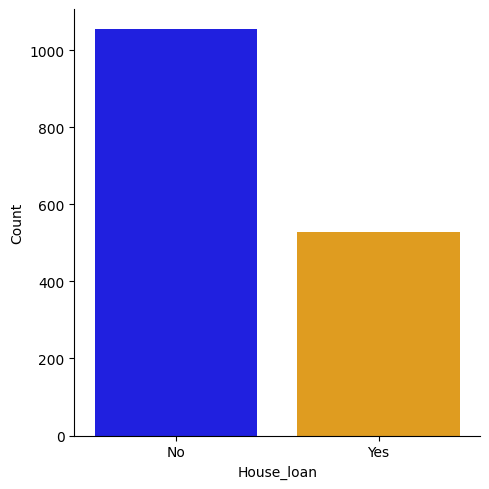

In [166]:
a=sns.catplot(df,x="House_loan",y="Age",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange","Green"])
a.set(ylabel='Count')


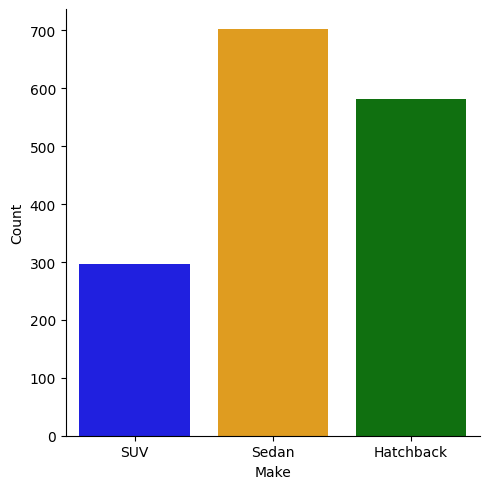

In [167]:
a=sns.catplot(df,x="Make",y="Age",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange","Green"])
a.set(ylabel='Count')


In [168]:
# Pivot table for Gender & Type of professionals they are working

In [169]:
new = pd.pivot_table(df, values = "Age" , index = "Gender",columns="Profession", aggfunc="count")
new

Profession,Business,Salaried
Gender,,
Female,105,224
Male,580,672


Text(0.5, 1.0, 'Salaried')

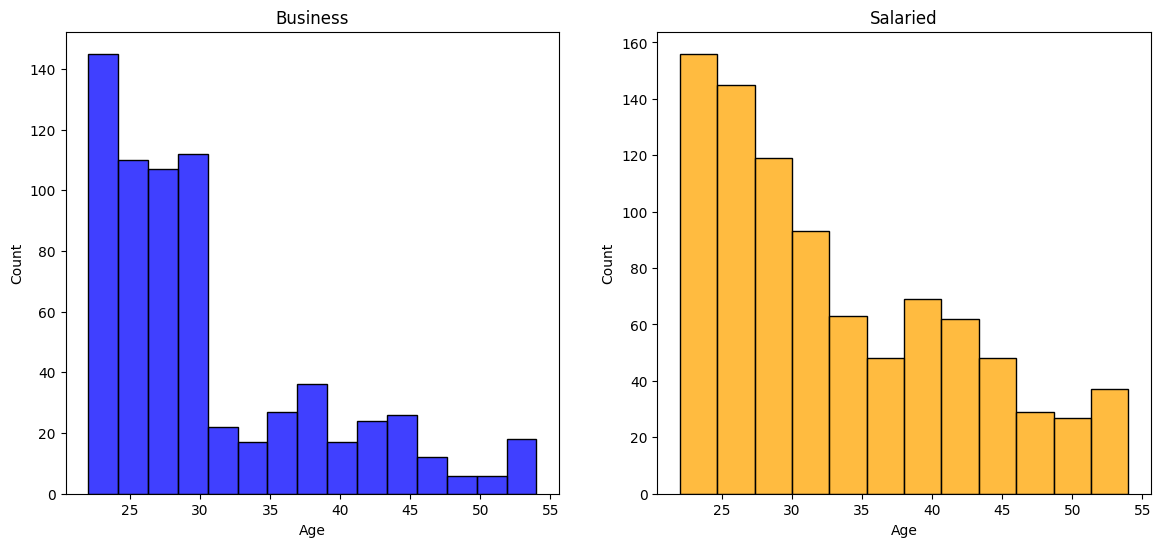

In [170]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df[df['Profession'] == 'Business']["Age"], ax=axs[0],color='blue')
axs[0].set_title('Business')
sns.histplot(df[df['Profession'] == 'Salaried']["Age"], ax=axs[1], color='orange')
axs[1].set_title('Salaried')





Text(0.5, 1.0, 'Female')

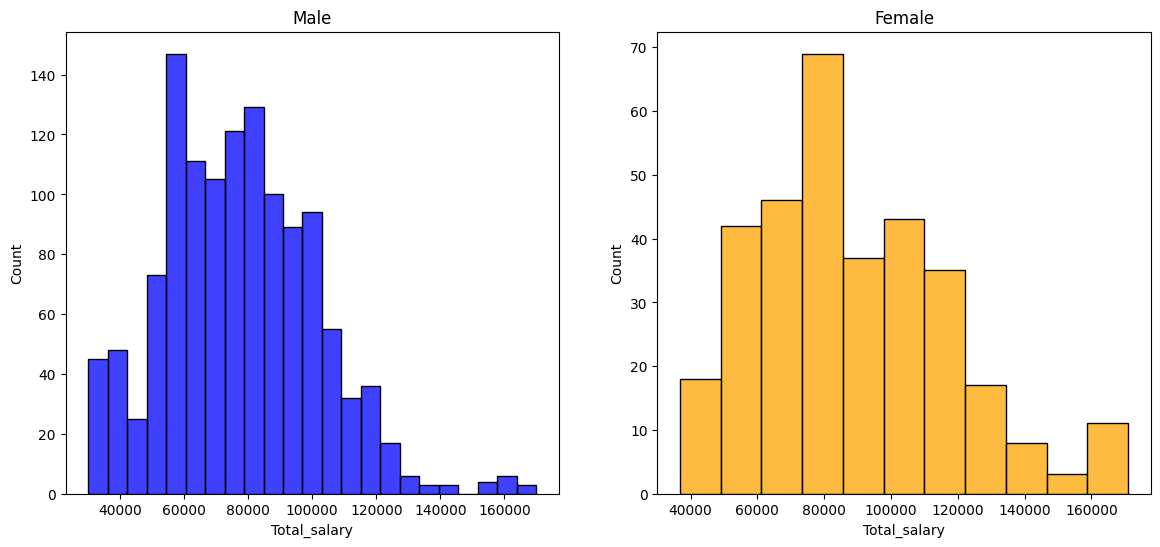

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df[df['Gender'] == 'Male']['Total_salary'], ax=axs[0],color='blue')
axs[0].set_title('Male')

sns.histplot(df[df['Gender'] == 'Female']['Total_salary'], ax=axs[1], color='orange')
axs[1].set_title('Female')


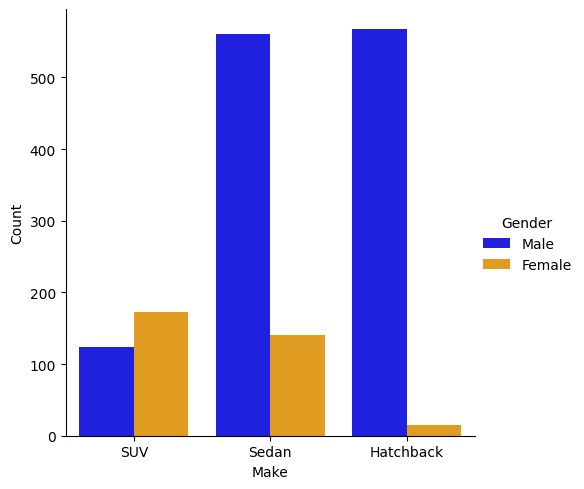

In [172]:
a=sns.catplot(df,x="Make",y="Age",hue="Gender",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange","Green"])
a.set(ylabel='Count')


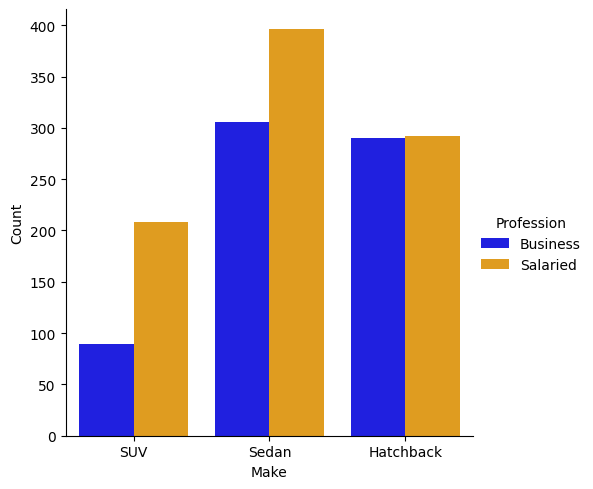

In [173]:
a=sns.catplot(df,x="Make",y="Age",hue="Profession",kind="bar",errorbar=None,estimator="count",palette=["Blue","Orange","Green"])
a.set(ylabel='Count')

In [174]:
new = pd.pivot_table(df, values = "Age" , index = ["No_of_Dependents","Marital_status"],columns=["Make"], aggfunc="count")
new

Make                             Hatchback    SUV  Sedan
No_of_Dependents Marital_status                         
0                Single               15.0    5.0    NaN
1                Married              10.0   34.0  171.0
                 Single                1.0    NaN   13.0
2                Married             113.0   76.0  264.0
                 Single               68.0   11.0   25.0
3                Married             256.0  117.0  184.0
4                Married             119.0   54.0   45.0

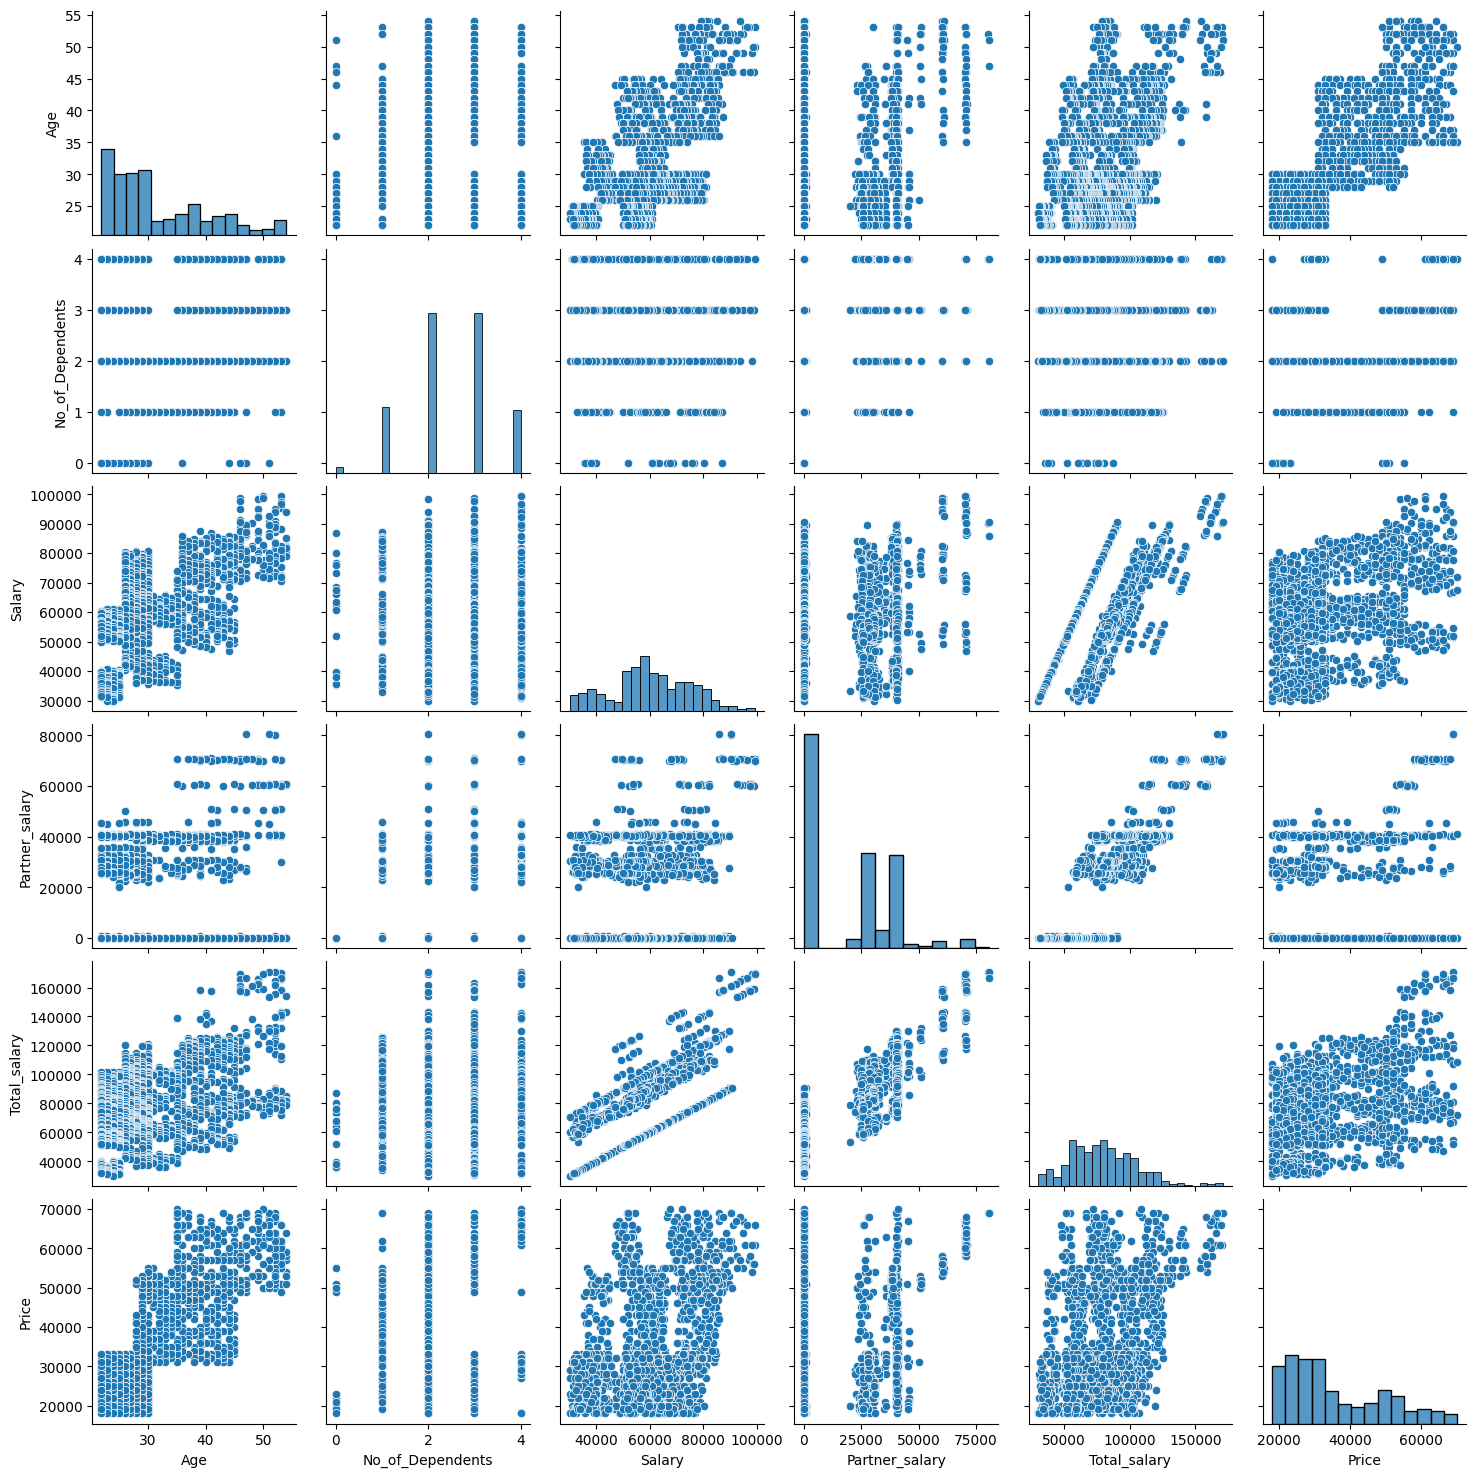

In [175]:
#sns.pairplot(df,hue="Make")
sns.pairplot(df)

# Data Analysis and Checking the insights - find the answer of given questions

In [176]:
# Q1 . Check Steve roger's Statement

In [177]:
df.groupby("Make")["Make"].count()

Make
Hatchback    582
SUV          297
Sedan        702
Name: Make, dtype: int64

In [178]:
df.Make.value_counts() # both work same but it arrange desc or while group doesn't have any sequence

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

In [179]:
df.groupby(["Gender","Make"])["Make"].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [180]:
# check the count of male and female
df.Gender.value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [181]:
male = df.where(df["Gender"] == "Male").dropna()[["Gender","Make"]]

In [182]:
female = df.where(df["Gender"] == "Female").dropna()[["Gender","Make"]]

In [183]:
sam1= male.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [184]:
sam2 = male.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [185]:
sam3 = male.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [186]:
sam1

,Male
Make,
Hatchback,149
SUV,32
Sedan,148


In [187]:
sam2

,Male
Make,
Hatchback,149
SUV,28
Sedan,152


In [188]:
sam3

,Male
Make,
Hatchback,158
SUV,30
Sedan,141


In [189]:
fem=female.groupby("Make").count().rename(columns={"Gender":"Female"})

In [190]:
fem

,Female
Make,
Hatchback,15
SUV,173
Sedan,141


In [191]:
#sam1,sam2,sam3
#fem,fem,fem

In [192]:
Suvmalelist=[sam1.iloc[1][0],sam2.iloc[1][0],sam3.iloc[1][0]]

In [193]:
Suvmalelist

[np.int64(32), np.int64(28), np.int64(30)]

In [194]:
Suvfemalelist=[fem.iloc[1][0],fem.iloc[1][0],fem.iloc[1][0]]

In [195]:
Suvfemalelist

[np.int64(173), np.int64(173), np.int64(173)]

In [196]:
SUVDataset  = pd.DataFrame({"Male":Suvmalelist,"Female":Suvfemalelist} , index=["SUV_Sample1","SUV_Sample2","SUV_Sample3"])

In [197]:
SUVDataset

,Male,Female
SUV_Sample1,32,173
SUV_Sample2,28,173
SUV_Sample3,30,173


<Axes: >

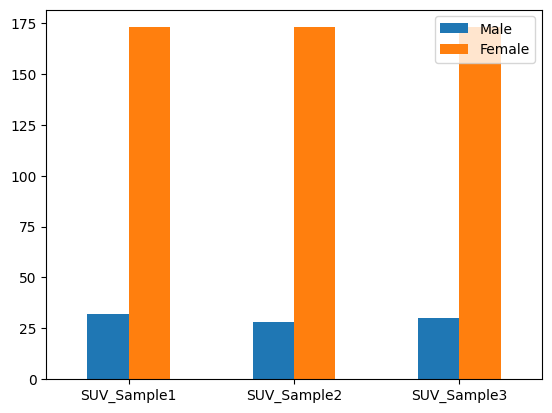

In [198]:
SUVDataset.plot.bar(rot=0)

In [199]:
# Observation : I am not agree with steve rogers, acc to the data i can say that females are more interest
# in SUV over males

In [200]:
# Similarly Hatchback

In [201]:
HBmalelist=[sam1.iloc[0][0],sam2.iloc[0][0],sam3.iloc[0][0]]

In [202]:
HBmalelist

[np.int64(149), np.int64(149), np.int64(158)]

In [203]:
HBfemalelist=[fem.iloc[0][0],fem.iloc[0][0],fem.iloc[0][0]]

In [204]:
HBfemalelist

[np.int64(15), np.int64(15), np.int64(15)]

In [205]:
HBDataset= pd.DataFrame({"Male":HBmalelist,"Female":HBfemalelist} , index=["HB_Sample1","HB_Sample2","HB_Sample3"])

In [206]:
HBDataset

,Male,Female
HB_Sample1,149,15
HB_Sample2,149,15
HB_Sample3,158,15


<Axes: >

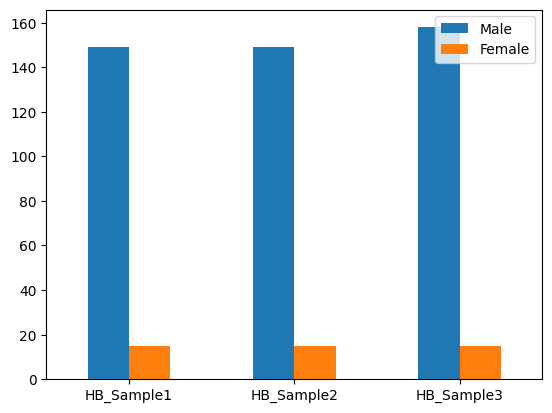

In [207]:
HBDataset.plot.bar(rot=0)

In [208]:
# Acc to the data i can say males are more likely to buy Hatchbak over females

In [209]:
# Similarlily for sedan

In [210]:
SDmalelist=[sam1.iloc[2][0],sam2.iloc[2][0],sam3.iloc[2][0]]

In [211]:
SDmalelist

[np.int64(148), np.int64(152), np.int64(141)]

In [212]:
SDfemalelist=[fem.iloc[2][0],fem.iloc[2][0],fem.iloc[2][0]]

In [213]:
SDfemalelist

[np.int64(141), np.int64(141), np.int64(141)]

In [214]:
SDDataset= pd.DataFrame({"Male":SDmalelist,"Female":SDfemalelist} , index=["Sedan_Sample1","Sedan_Sample2","Sedan_Sample3"])

In [215]:
SDDataset

,Male,Female
Sedan_Sample1,148,141
Sedan_Sample2,152,141
Sedan_Sample3,141,141


<Axes: >

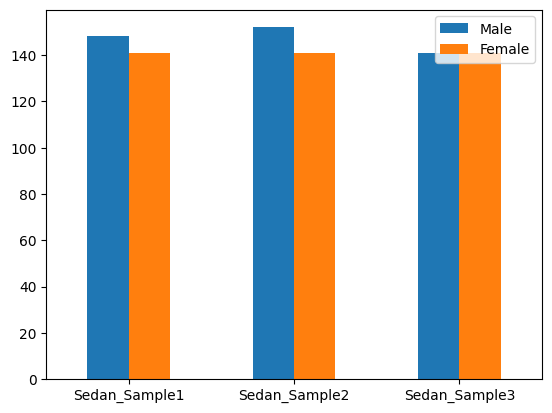

In [216]:
SDDataset.plot.bar(rot=0)

In [217]:
# About sedan i can say there is no any big difference.
# males and females both are equally interested in Sedan.

In [218]:
# Q2. Ned stark beleives that salaried person is more likely to buy a sedan

In [219]:
Salaried = df.where(df["Profession"]=="Salaried").dropna()[["Profession","Make"]]

In [220]:
Business = df.where(df["Profession"]=="Business").dropna()[["Profession","Make"]]

In [221]:
df.Profession.value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [222]:
Sldata = Salaried.groupby("Make").count().rename(columns = {"Profession":"Salaried"})

In [223]:
Sldata

,Salaried
Make,
Hatchback,292
SUV,208
Sedan,396


In [224]:
Bsdata = Business.groupby("Make").count().rename(columns = {"Profession":"Business"})

In [225]:
Bsdata

,Business
Make,
Hatchback,290
SUV,89
Sedan,306


In [226]:
Bslist = [Bsdata.iloc[0][0], Bsdata.iloc[1][0],Bsdata.iloc[2][0]]

In [227]:
Bslist

[np.int64(290), np.int64(89), np.int64(306)]

In [228]:
Sllist = [Sldata.iloc[0][0], Sldata.iloc[1][0],Sldata.iloc[2][0]]

In [229]:
Sllist

[np.int64(292), np.int64(208), np.int64(396)]

In [230]:
PfDataset = pd.DataFrame({"Salaried":Sllist,"Business":Bslist},index=["Hatchback","SUV","Sedan"])

In [231]:
PfDataset

,Salaried,Business
Hatchback,292,290
SUV,208,89
Sedan,396,306


<Axes: >

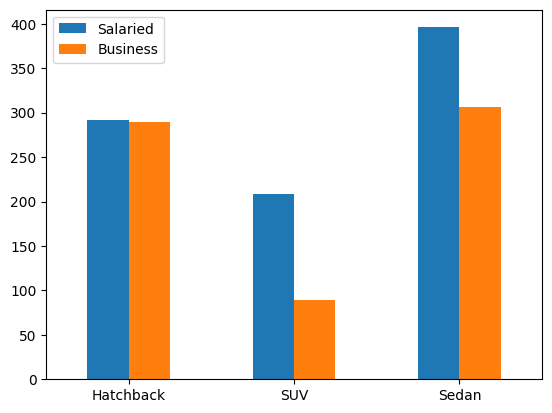

In [232]:
PfDataset.plot.bar(rot=0)

In [233]:
# It is observed that salaried person are more interested in SUV and also i Sedan ... hatchback has equal intersted

In [234]:
#Q3. Salaried male is easier target of SUV sale over Sedan

In [235]:
df.groupby(["Profession","Gender","Make"])["Make"].count()

Profession  Gender  Make     
Business    Female  SUV           55
                    Sedan         50
            Male    Hatchback    290
                    SUV           34
                    Sedan        256
Salaried    Female  Hatchback     15
                    SUV          118
                    Sedan         91
            Male    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

In [236]:
#Q4.F1 : Gender

In [237]:
df.groupby(["Gender","Make"])["Price"].sum()

Gender  Make     
Female  Hatchback      412000
        SUV           9252000
        Sedan         6031000
Male    Hatchback    14996000
        SUV           7328000
        Sedan        18261000
Name: Price, dtype: int64

In [238]:
#Q4.F2 : Personal Loan

In [239]:
df.groupby(["Personal_loan","Make"])["Price"].sum()

Personal_loan  Make     
No             Hatchback     7765000
               SUV          10373000
               Sedan        10852000
Yes            Hatchback     7643000
               SUV           6207000
               Sedan        13440000
Name: Price, dtype: int64

In [240]:
# working partner with higher price car

In [241]:
data = df.groupby(["Partner_working","Make","Price"])["Make"].count()

In [242]:
data

Partner_working  Make       Price
No               Hatchback  18000     2
                            19000     9
                            20000    23
                            21000     2
                            22000    23
                                     ..
Yes              Sedan      51000     5
                            52000    10
                            53000    10
                            54000     9
                            55000     5
Name: Make, Length: 163, dtype: int64

In [243]:
data_sort = data.sort_values()

In [244]:
data_sort

Partner_working  Make       Price
No               SUV        39000     1
                            48000     1
                            32000     1
                            70000     1
                 Sedan      22000     1
                                     ..
Yes              Hatchback  28000    28
                            22000    30
                            30000    32
                            20000    35
                            32000    38
Name: Make, Length: 163, dtype: int64

In [245]:
#: Yes , From the current data set provided the buyers having working partner tend to purchase car with Higher price.

In [246]:
# Marital status  & gender

In [247]:
new=df.groupby(["Marital_status","Gender","Make"])["Make"].count()

In [248]:
new

Marital_status  Gender  Make     
Married         Female  Hatchback     14
                        SUV          166
                        Sedan        127
                Male    Hatchback    484
                        SUV          115
                        Sedan        537
Single          Female  Hatchback      1
                        SUV            7
                        Sedan         14
                Male    Hatchback     83
                        SUV            9
                        Sedan         24
Name: Make, dtype: int64

In [249]:
#new = new.reset_index(name="count")

In [250]:
#sns.catplot(data=new, x='Make', y='count', hue='Marital_status',errorbar=None , col="Gender",kind="bar")
